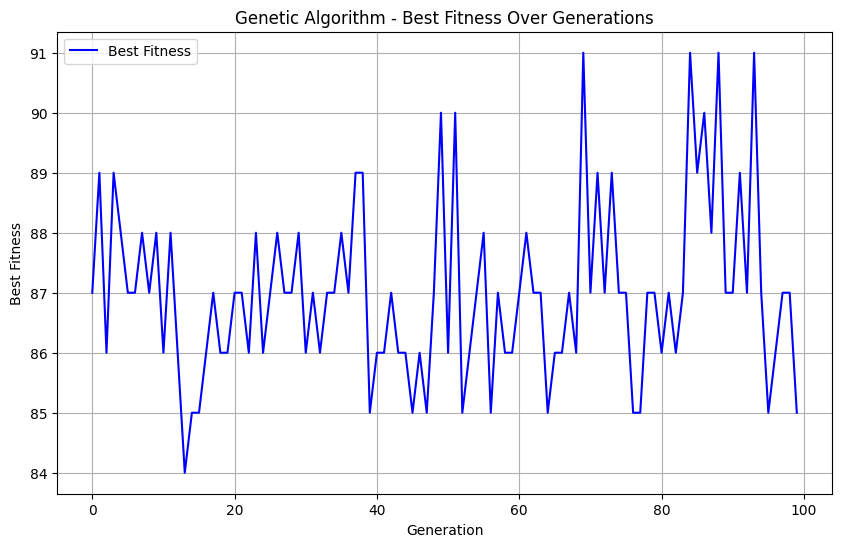

Best Motif Found: TTTACTGTTGGATCA
Best Fitness Found: 91

Evaluation Metrics:
Average Hamming Distance: 10.20
Accuracy: 32.00%
Recall (within 4 mismatches): 0.00%


(10.2, 0.32, 0.0)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate random DNA sequences with implanted motif (and keep the implanted motifs)
def generate_dna_sequences(t, N, k, d):
    dna_sequences = []
    implanted_motifs = []
    base_motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        mutated_motif = list(base_motif)
        mutation_positions = random.sample(range(k), d)
        for pos in mutation_positions:
            mutated_motif[pos] = random.choice([b for b in 'ACGT' if b != mutated_motif[pos]])
        mutated_motif = ''.join(mutated_motif)

        position = random.randint(0, N - k)
        sequence = ''.join(random.choice('ACGT') for _ in range(N))
        sequence = sequence[:position] + mutated_motif + sequence[position + k:]
        dna_sequences.append(sequence)
        implanted_motifs.append(mutated_motif)

    return dna_sequences, implanted_motifs, base_motif

# Fitness function
def fitness(motif, sequences, k):
    score = 0
    for sequence in sequences:
        max_match = 0
        for i in range(len(sequence) - k + 1):
            match = sum([1 for a, b in zip(motif, sequence[i:i+k]) if a == b])
            max_match = max(max_match, match)
        score += max_match
    return score

# Crossover function
def crossover(motif1, motif2):
    crossover_point = random.randint(1, len(motif1)-1)
    return motif1[:crossover_point] + motif2[crossover_point:]

# Mutation function
def mutate(motif, mutation_rate=0.1):
    motif = list(motif)
    for i in range(len(motif)):
        if random.random() < mutation_rate:
            motif[i] = random.choice('ACGT')
    return ''.join(motif)

# Genetic Algorithm
def genetic_algorithm(sequences, t, N, k, d, population_size=50, generations=100, mutation_rate=0.1):
    population = [''.join(random.choice('ACGT') for _ in range(k)) for _ in range(population_size)]
    best_motif = None
    best_fitness = -1
    best_fitness_values = []

    for generation in range(generations):
        population_fitness = [(motif, fitness(motif, sequences, k)) for motif in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)
        best_fitness_values.append(population_fitness[0][1])

        if population_fitness[0][1] > best_fitness:
            best_fitness = population_fitness[0][1]
            best_motif = population_fitness[0][0]

        selected = [x[0] for x in population_fitness[:population_size // 2]]
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)
        population = [mutate(child, mutation_rate) for child in new_population]

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(range(generations), best_fitness_values, label='Best Fitness', color='b')
    plt.title('Genetic Algorithm - Best Fitness Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Best Motif Found:", best_motif)
    print("Best Fitness Found:", best_fitness)

    return best_motif, best_fitness

# Evaluation metrics
def evaluate(best_motif, implanted_motifs, k, d):
    hamming_distances = [sum(a != b for a, b in zip(best_motif, motif)) for motif in implanted_motifs]
    avg_hamming_distance = sum(hamming_distances) / len(hamming_distances)

    # Accuracy: proportion of correct characters in the motif across all sequences
    total_chars = len(implanted_motifs) * k
    total_matches = sum(k - dist for dist in hamming_distances)
    accuracy = total_matches / total_chars

    # Recall: proportion of sequences where the predicted motif is within d mismatches
    recall = sum(1 for dist in hamming_distances if dist <= d) / len(implanted_motifs)

    print(f"\nEvaluation Metrics:")
    print(f"Average Hamming Distance: {avg_hamming_distance:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall (within {d} mismatches): {recall:.2%}")

    return avg_hamming_distance, accuracy, recall


# Example run
t = 10
N = 100
k = 15
d = 4

sequences, implanted_motifs, planted_motif = generate_dna_sequences(t, N, k, d)
best_motif, best_fitness = genetic_algorithm(sequences, t, N, k, d)
evaluate(best_motif, implanted_motifs, k, d)




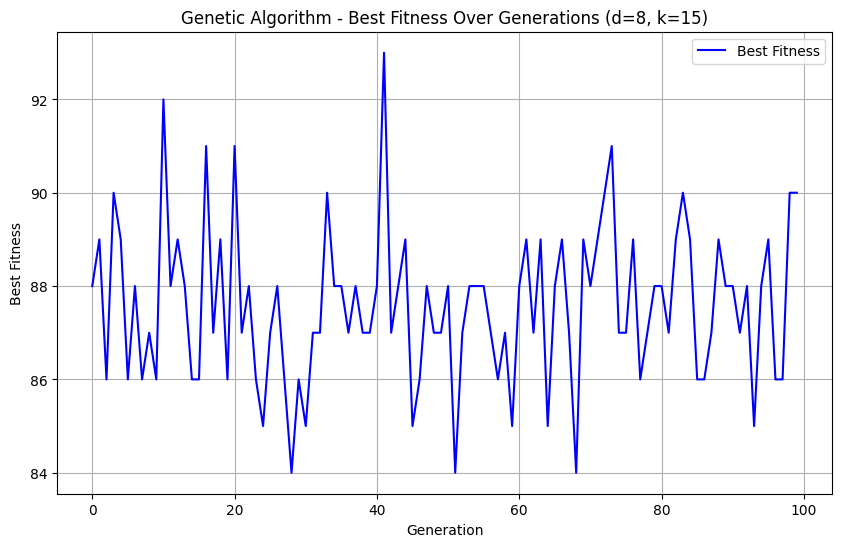

Best Motif Found: CGGCCGAATTGCGTT
Best Fitness Found: 93

--- Evaluation Metrics ---
Average Hamming Distance: 9.60
Accuracy: 36.00%
Recall (within 8 mismatches): 20.00%


(9.6, 0.36, 0.2)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Modified DNA sequence generator: implants the same motif with d mutations
def generate_dna_sequences(t, N, k, d):
    dna_sequences = []
    implanted_motifs = []
    base_motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        motif = list(base_motif)
        mutation_indices = random.sample(range(k), d)
        for idx in mutation_indices:
            motif[idx] = random.choice([c for c in 'ACGT' if c != motif[idx]])
        mutated_motif = ''.join(motif)

        position = random.randint(0, N - k)
        sequence = ''.join(random.choice('ACGT') for _ in range(N))
        sequence = sequence[:position] + mutated_motif + sequence[position + k:]
        dna_sequences.append(sequence)
        implanted_motifs.append(mutated_motif)

    return dna_sequences, implanted_motifs, base_motif

# Fitness function
def fitness(motif, sequences, k):
    score = 0
    for sequence in sequences:
        max_match = 0
        for i in range(len(sequence) - k + 1):
            match = sum([1 for a, b in zip(motif, sequence[i:i+k]) if a == b])
            max_match = max(max_match, match)
        score += max_match
    return score

# Crossover
def crossover(motif1, motif2):
    crossover_point = random.randint(1, len(motif1)-1)
    return motif1[:crossover_point] + motif2[crossover_point:]

# Mutation
def mutate(motif, mutation_rate=0.1):
    motif = list(motif)
    for i in range(len(motif)):
        if random.random() < mutation_rate:
            motif[i] = random.choice('ACGT')
    return ''.join(motif)

# Genetic Algorithm
def genetic_algorithm(sequences, t, N, k, d, population_size=50, generations=100, mutation_rate=0.1):
    population = [''.join(random.choice('ACGT') for _ in range(k)) for _ in range(population_size)]
    best_motif = None
    best_fitness = -1
    best_fitness_values = []

    for generation in range(generations):
        population_fitness = [(motif, fitness(motif, sequences, k)) for motif in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)

        best_fitness_values.append(population_fitness[0][1])

        if population_fitness[0][1] > best_fitness:
            best_fitness = population_fitness[0][1]
            best_motif = population_fitness[0][0]

        selected_population = [x[0] for x in population_fitness[:population_size//2]]
        new_population = []
        for _ in range(population_size//2):
            parent1, parent2 = random.sample(selected_population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)

        population = [mutate(child, mutation_rate) for child in new_population]

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(range(generations), best_fitness_values, label='Best Fitness', color='b')
    plt.title('Genetic Algorithm - Best Fitness Over Generations (d=8, k=15)')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Best Motif Found:", best_motif)
    print("Best Fitness Found:", best_fitness)

    return best_motif, best_fitness

# Evaluation function
def evaluate(best_motif, implanted_motifs, k, d):
    hamming_distances = [sum(a != b for a, b in zip(best_motif, motif)) for motif in implanted_motifs]
    avg_hamming = sum(hamming_distances) / len(hamming_distances)

    total_chars = k * len(implanted_motifs)
    total_matches = sum(k - dist for dist in hamming_distances)
    accuracy = total_matches / total_chars

    recall = sum(1 for dist in hamming_distances if dist <= d) / len(implanted_motifs)

    print("\n--- Evaluation Metrics ---")
    print(f"Average Hamming Distance: {avg_hamming:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall (within {d} mismatches): {recall:.2%}")

    return avg_hamming, accuracy, recall

# Main
t = 10
N = 100
k = 15
d = 8

sequences, implanted_motifs, base_motif = generate_dna_sequences(t, N, k, d)
best_motif, best_fitness = genetic_algorithm(sequences, t, N, k, d)
evaluate(best_motif, implanted_motifs, k, d)




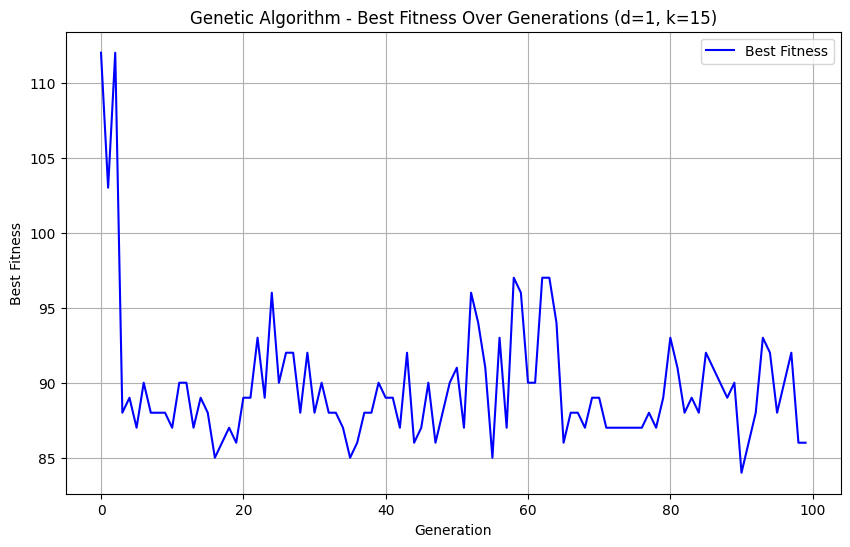

Best Motif Found: ACATCGCCGCCTGCC
Best Fitness Found: 112

--- Evaluation Metrics ---
Average Hamming Distance: 3.80
Accuracy: 74.67%
Recall (within 1 mismatches): 0.00%


(3.8, 0.7466666666666667, 0.0)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate random DNA sequences with a motif implanted (and track implanted motifs)
def generate_dna_sequences(t, N, k, d):
    dna_sequences = []
    implanted_motifs = []

    # Create a common base motif to implant with d mutations
    base_motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        mutated_motif = list(base_motif)
        mutation_indices = random.sample(range(k), d)
        for idx in mutation_indices:
            mutated_motif[idx] = random.choice([c for c in 'ACGT' if c != mutated_motif[idx]])
        mutated_motif = ''.join(mutated_motif)

        position = random.randint(0, N - k - 1)
        sequence = ''.join(random.choice('ACGT') for _ in range(N))
        sequence = sequence[:position] + mutated_motif + sequence[position + k:]
        dna_sequences.append(sequence)
        implanted_motifs.append(mutated_motif)

    return dna_sequences, implanted_motifs, base_motif

# Fitness function
def fitness(motif, sequences, k):
    score = 0
    for sequence in sequences:
        max_match = 0
        for i in range(len(sequence) - k + 1):
            match = sum([1 for a, b in zip(motif, sequence[i:i+k]) if a == b])
            max_match = max(max_match, match)
        score += max_match
    return score

# Crossover function
def crossover(motif1, motif2):
    crossover_point = random.randint(1, len(motif1) - 1)
    return motif1[:crossover_point] + motif2[crossover_point:]

# Mutation function
def mutate(motif, mutation_rate=0.1):
    motif = list(motif)
    for i in range(len(motif)):
        if random.random() < mutation_rate:
            motif[i] = random.choice('ACGT')
    return ''.join(motif)

# Genetic Algorithm
def genetic_algorithm(sequences, t, N, k, d, population_size=50, generations=100, mutation_rate=0.1):
    population = [''.join(random.choice('ACGT') for _ in range(k)) for _ in range(population_size)]
    best_motif = None
    best_fitness = -1
    best_fitness_values = []

    for generation in range(generations):
        population_fitness = [(motif, fitness(motif, sequences, k)) for motif in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)

        best_fitness_values.append(population_fitness[0][1])

        if population_fitness[0][1] > best_fitness:
            best_fitness = population_fitness[0][1]
            best_motif = population_fitness[0][0]

        selected_population = [x[0] for x in population_fitness[:population_size//2]]
        new_population = []
        for _ in range(population_size//2):
            parent1, parent2 = random.sample(selected_population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)

        population = [mutate(child, mutation_rate) for child in new_population]

    # Visualization of best fitness
    plt.figure(figsize=(10, 6))
    plt.plot(range(generations), best_fitness_values, label='Best Fitness', color='b')
    plt.title(f'Genetic Algorithm - Best Fitness Over Generations (d={d}, k={k})')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Best Motif Found:", best_motif)
    print("Best Fitness Found:", best_fitness)

    return best_motif, best_fitness

# Evaluation Metrics
def evaluate(best_motif, implanted_motifs, k, d):
    hamming_distances = [sum(a != b for a, b in zip(best_motif, motif)) for motif in implanted_motifs]
    avg_hamming = sum(hamming_distances) / len(hamming_distances)

    total_chars = len(implanted_motifs) * k
    total_matches = sum(k - dist for dist in hamming_distances)
    accuracy = total_matches / total_chars

    recall = sum(1 for dist in hamming_distances if dist <= d) / len(implanted_motifs)

    print("\n--- Evaluation Metrics ---")
    print(f"Average Hamming Distance: {avg_hamming:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall (within {d} mismatches): {recall:.2%}")

    return avg_hamming, accuracy, recall

# Example usage
t = 10
N = 100
k = 15
d = 1

sequences, implanted_motifs, base_motif = generate_dna_sequences(t, N, k, d)
best_motif, best_fitness = genetic_algorithm(sequences, t, N, k, d)
evaluate(best_motif, implanted_motifs, k, d)



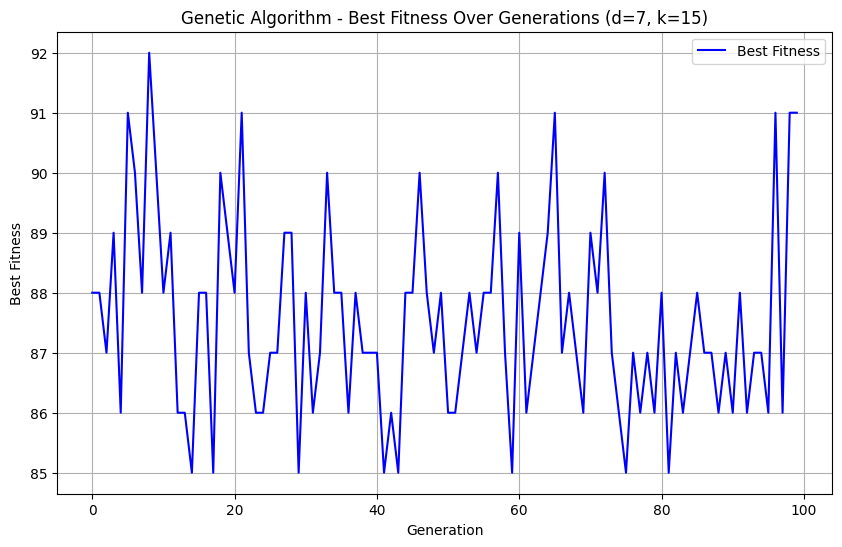

Best Motif Found: TCCTCCCACATCACT
Best Fitness Found: 92

--- Evaluation Metrics ---
Average Hamming Distance: 9.30
Accuracy: 38.00%
Recall (within 7 mismatches): 20.00%


(9.3, 0.38, 0.2)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate random DNA sequences with a motif implanted
def generate_dna_sequences(t, N, k, d):
    dna_sequences = []
    implanted_motifs = []
    base_motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        mutated_motif = list(base_motif)
        mutation_indices = random.sample(range(k), d)
        for idx in mutation_indices:
            mutated_motif[idx] = random.choice([c for c in 'ACGT' if c != mutated_motif[idx]])
        mutated_motif = ''.join(mutated_motif)

        position = random.randint(0, N - k - 1)
        sequence = ''.join(random.choice('ACGT') for _ in range(N))
        sequence = sequence[:position] + mutated_motif + sequence[position + k:]
        dna_sequences.append(sequence)
        implanted_motifs.append(mutated_motif)

    return dna_sequences, implanted_motifs, base_motif

# Fitness function: calculates the score of a motif against a given sequence
def fitness(motif, sequences, k):
    score = 0
    for sequence in sequences:
        max_match = 0
        for i in range(len(sequence) - k + 1):
            match = sum([1 for a, b in zip(motif, sequence[i:i+k]) if a == b])
            max_match = max(max_match, match)
        score += max_match
    return score

# Crossover function: combine two motifs
def crossover(motif1, motif2):
    crossover_point = random.randint(1, len(motif1)-1)
    return motif1[:crossover_point] + motif2[crossover_point:]

# Mutation function: mutate a motif at a random position
def mutate(motif, mutation_rate=0.1):
    motif = list(motif)
    for i in range(len(motif)):
        if random.random() < mutation_rate:
            motif[i] = random.choice('ACGT')
    return ''.join(motif)

# Main function to run the Genetic Algorithm
def genetic_algorithm(sequences, t, N, k, d, population_size=50, generations=100, mutation_rate=0.1):
    population = [''.join(random.choice('ACGT') for _ in range(k)) for _ in range(population_size)]
    best_motif = None
    best_fitness = -1
    best_fitness_values = []

    for generation in range(generations):
        population_fitness = [(motif, fitness(motif, sequences, k)) for motif in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)

        best_fitness_values.append(population_fitness[0][1])

        if population_fitness[0][1] > best_fitness:
            best_fitness = population_fitness[0][1]
            best_motif = population_fitness[0][0]

        selected_population = [x[0] for x in population_fitness[:population_size//2]]

        new_population = []
        for _ in range(population_size//2):
            parent1, parent2 = random.sample(selected_population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)

        population = [mutate(child, mutation_rate) for child in new_population]

    # Visualization of best fitness
    plt.figure(figsize=(10, 6))
    plt.plot(range(generations), best_fitness_values, label='Best Fitness', color='b')
    plt.title(f'Genetic Algorithm - Best Fitness Over Generations (d={d}, k={k})')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Best Motif Found:", best_motif)
    print("Best Fitness Found:", best_fitness)

    return best_motif, best_fitness

# Evaluation Metrics
def evaluate(best_motif, implanted_motifs, k, d):
    hamming_distances = [sum(a != b for a, b in zip(best_motif, motif)) for motif in implanted_motifs]
    avg_hamming = sum(hamming_distances) / len(hamming_distances)

    total_matches = sum(k - dist for dist in hamming_distances)
    total_chars = len(implanted_motifs) * k
    accuracy = total_matches / total_chars

    recall = sum(1 for dist in hamming_distances if dist <= d) / len(implanted_motifs)

    print("\n--- Evaluation Metrics ---")
    print(f"Average Hamming Distance: {avg_hamming:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall (within {d} mismatches): {recall:.2%}")

    return avg_hamming, accuracy, recall

# Example usage
t = 10
N = 100
k = 15  # motif length
d = 7   # number of mutations

sequences, implanted_motifs, base_motif = generate_dna_sequences(t, N, k, d)
best_motif, best_fitness = genetic_algorithm(sequences, t, N, k, d)
evaluate(best_motif, implanted_motifs, k, d)



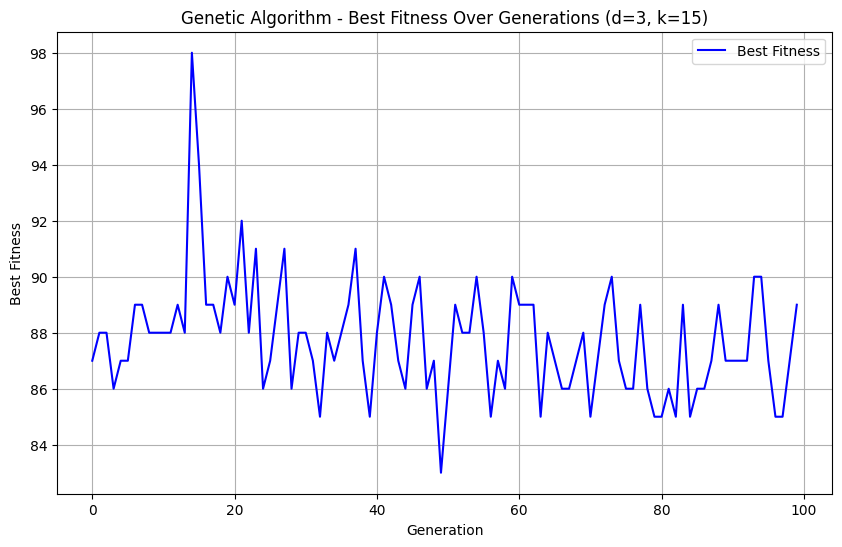

Best Motif Found: CTGTGCCATCCTGAG
Best Fitness Found: 98

--- Evaluation Metrics ---
Average Hamming Distance: 11.10
Accuracy: 26.00%
Recall (within 3 mismatches): 0.00%


(11.1, 0.26, 0.0)

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate random DNA sequences with a motif implanted
def generate_dna_sequences(t, N, k, d):
    dna_sequences = []
    implanted_motifs = []
    base_motif = ''.join(random.choice('ACGT') for _ in range(k))

    for _ in range(t):
        # Mutate base motif in 'd' positions
        mutated_motif = list(base_motif)
        mutation_indices = random.sample(range(k), min(d, k))
        for idx in mutation_indices:
            mutated_motif[idx] = random.choice([c for c in 'ACGT' if c != mutated_motif[idx]])
        mutated_motif = ''.join(mutated_motif)

        # Insert mutated motif into random position
        sequence = ''.join(random.choice('ACGT') for _ in range(N))
        pos = random.randint(0, N - k)
        sequence = sequence[:pos] + mutated_motif + sequence[pos + k:]
        dna_sequences.append(sequence)
        implanted_motifs.append(mutated_motif)

    return dna_sequences, implanted_motifs, base_motif

# Fitness function
def fitness(motif, sequences, k):
    score = 0
    for sequence in sequences:
        max_match = 0
        for i in range(len(sequence) - k + 1):
            match = sum([1 for a, b in zip(motif, sequence[i:i+k]) if a == b])
            max_match = max(max_match, match)
        score += max_match
    return score

# Crossover function
def crossover(motif1, motif2):
    crossover_point = random.randint(1, len(motif1)-1)
    return motif1[:crossover_point] + motif2[crossover_point:]

# Mutation function
def mutate(motif, mutation_rate=0.1):
    motif = list(motif)
    for i in range(len(motif)):
        if random.random() < mutation_rate:
            motif[i] = random.choice('ACGT')
    return ''.join(motif)

# Genetic Algorithm
def genetic_algorithm(sequences, t, N, k, d, population_size=50, generations=100, mutation_rate=0.1):
    population = [''.join(random.choice('ACGT') for _ in range(k)) for _ in range(population_size)]
    best_motif = None
    best_fitness = -1
    best_fitness_values = []

    for generation in range(generations):
        population_fitness = [(motif, fitness(motif, sequences, k)) for motif in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)

        best_fitness_values.append(population_fitness[0][1])

        if population_fitness[0][1] > best_fitness:
            best_fitness = population_fitness[0][1]
            best_motif = population_fitness[0][0]

        selected_population = [x[0] for x in population_fitness[:population_size//2]]
        new_population = []
        for _ in range(population_size//2):
            parent1, parent2 = random.sample(selected_population, 2)
            child = crossover(parent1, parent2)
            new_population.append(child)
        population = [mutate(child, mutation_rate) for child in new_population]

    # Plot fitness progression
    plt.figure(figsize=(10, 6))
    plt.plot(range(generations), best_fitness_values, label='Best Fitness', color='b')
    plt.title(f'Genetic Algorithm - Best Fitness Over Generations (d={d}, k={k})')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.grid(True)
    plt.legend()
    plt.show()

    print("Best Motif Found:", best_motif)
    print("Best Fitness Found:", best_fitness)
    return best_motif, best_fitness

# Evaluation metrics
def evaluate(best_motif, implanted_motifs, k, d):
    hamming_distances = [sum(a != b for a, b in zip(best_motif, motif)) for motif in implanted_motifs]
    avg_hamming = sum(hamming_distances) / len(hamming_distances)

    total_matches = sum(k - dist for dist in hamming_distances)
    total_chars = len(implanted_motifs) * k
    accuracy = total_matches / total_chars

    recall = sum(1 for dist in hamming_distances if dist <= d) / len(implanted_motifs)

    print("\n--- Evaluation Metrics ---")
    print(f"Average Hamming Distance: {avg_hamming:.2f}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Recall (within {d} mismatches): {recall:.2%}")
    return avg_hamming, accuracy, recall

# Main execution
t = 10
N = 100
k = 15
d = 3

sequences, implanted_motifs, base_motif = generate_dna_sequences(t, N, k, d)
best_motif, best_fitness = genetic_algorithm(sequences, t, N, k, d)
evaluate(best_motif, implanted_motifs, k, d)

